# Confronto tra Insertion-sort e Quick-Sort

## Indice
1. [Introduzione](#introduzione)
    1. [Specifiche della macchina](#specifiche-della-macchina)
    2. [Librerie utilizzate](#librerie-utilizzate)
2. [Cenni Teorici](#cenni-teorici)
    1. [Insertion-sort](#insertion-sort)
    2. [Quick-sort](#quick-sort)
3. [Esperimenti](#esperimenti)
    1. [Descrizione](#descrizione-esperimenti)
    2. [Esecuzione](#esecuzione-esperimenti)
4. [Conclusioni](#conclusioni)

## Introduzione
Con questo notebook si vuole eseguire il confronto di due algoritmi di ordinamento, insertion-sort e quick-sort.
Entrambi lavorano su liste di oggetti ma le loro prestazioni possono variare in base a fattori quali: 
1. Lunghezza della lista
2. Elementi della lista da ordinare
3. Ordine degli elementi della lista

L'oggetto di questo notebook sarà quello di confrontare i due algoritmi di ordinamento in base a questi tre fattori.
### Specifiche della macchina
La macchina su cui è stato eseguito questo notebook è un portatile con le seguenti caratteristiche:
* CPU: AMD Ryzen 5 4600U 
* RAM: 16GB DDR4 3200MHz
* OS: Windows 11 Pro 64-bit
* Ambiente: WSL con Ubuntu 20.04

### Librerie utilizzate
Le librerie utilizzate per lo sviluppo di questo notebook sono indicate negli import seguenti con le relative versioni:

In [5]:
import numpy as np # 1.24.2
import pandas as pd # 2.0.0
import matplotlib.pyplot as plt # 3.7.1
import sys

sys.setrecursionlimit(1000000)

Inoltre viene modificato il limite di ricorsione di python per permettere l'esecuzione di algoritmi con liste di lunghezze elevate. Il numero è scelto arbitrariamente in seguito a vari tentativi di esecuzione dei test.
## Cenni Teorici
### Insertion Sort
#### Descrizione
Insertion sort è un algoritmo di ordinamento molto semplice: la lista viene ordinata un elemento alla volta confrontando l'elemento corrente con tutti quelli già ordinati e inserendolo nel punto giusto.
#### Implementazione

In [6]:
def insertion_sort(list: list) -> list:
  """ Algoritmo di ordinamento Insertion-Sort.
  Itera su tutti gli elementi della lista e ne esegue un inserimento ordinato.

  Args:
    list (list): lista di numeri da ordinare

  Returns:
    list: lista ordinata
  """
  for j in range(1, len(list) - 1):
    key = list[j]
    i = j - 1
    while i >= 0 and list[i] > key:
      list[i + 1] = list[i]
      i = i - 1
    list[i + 1] = key 
  
  return list

Il ciclo esterno itera su ogni elemento della lista, a partire da quello in posizione 1 in quanto possiamo assumere che una lista di lunghezza 1 è sempre ordinata. Mentre il ciclo interno inserisce l'elemento nella posizione corretta in modo da avere alla sua sinistra solo elementi minori o uguale e alla sua destra solo elementi maggiori e quelli non ancora ordinati.
#### Proprietà
Possiamo notare che insertion-sort ordina la lista senza l'utilizzo di memoria aggiuntiva in quanto permuta la lista originale e che è un algoritmo stabile in quanto mantiene l'ordine relativo degli elementi con chiave uguale.
#### Tempi di Esecuzione
Il miglior caso di esecuzione si ha quando la lista da ordinare è già ordinata, quindi l'algoritmo scorre semplicemente la lista. Il tempo di esecuzione è lineare i.e. $O(n)$.

Il peggior caso di esecuzione, invece, si ha quando la lista da ordinare è ordinata in ordine decrescente: a ogni iterazione l'algoritmo deve spostare l'intera partizione della lista già ordinata. Quindi si ha un tempo di esecuzione quadratico i.e. $O(n^2)$.

Anche il tempo di esecuzione medio è quadratico.
#### Alternative
È possibile fornire una versione ricorsiva dell'algoritmo che però non diminuisce il numero di righe di codice da scrivere, ha lo stesso tempo di esecuzione e, per effettuare la ricorsione, utilizza una quantità di memoria proporzionale alla lunghezza della lista. Per quests ragioni si preferisce utilizzare la versione iterativa.

Un altra modifica che è possibile effettuare consiste nell'effettuare una copia della lista da ordinare in modo da lasciare la lista originaria inalterata. Non viene presa in considerazione in quanto non rilevante ai fini della sperimentazione.

### Quick-Sort
#### Descrizione
Quick-sort è un algortimo di ordinamento basato sul concetto di divide et impera. La lista viene divisa in due parti, una contenente gli elementi minori di un elemento chiamato pivot e l'altra contenente gli elementi maggiori del pivot. Questo processo viene ripetuto ricorsivamente su ciascuna delle due parti fino a quando non si ottiene una lista ordinata.
#### Implementazione

In [7]:
def partition(list: list, p: int, r: int) -> int:
  """ Algoritmo di partizionamento. 
  Sposta gli elementi minori del pivot a sinistra e quelli maggiori a destra.

  Args:
    list (list): lista di numeri da ordinare
    p (int): indice iniziale
    r (int): indice finale

  Returns:
    int: indice dell'elemento pivot
  """
  x = list[r]
  i = p - 1
  for j in range(p, r):
    if list[j] <= x:
      i = i + 1 
      list[i], list[j] = list[j], list[i]
  list[i + 1], list[r] = list[r], list[i + 1]
  return i + 1

def quicksort(list: list, p: int, r: int):
  """ Algoritmo di ordinamento Quick-Sort. 
  Divide la lista in due parti e richiama se stesso sulla partizione sinistra e sulla partizione destra.

  Args:
    list (list): lista di numeri da ordinare
    p (int): indice iniziale
    r (int): indice finale
  """
  if p < r:
    q = partition(list, p, r)
    quicksort(list, p, q - 1)
    quicksort(list, q + 1, r)

Il metodo quicksort si occupa di dividere la lista in due parti e di chiamare ricorsivamente quicksort sulle due parti ottenute. Il metodo partition invece si occupa di dividere la lista in due parti e di restituire l'indice del pivot. Di conseguenza l'efficienza dell'algoritmo dipende dalla scelta del pivot.

L'ordinamento viene effettuato chiamando ``quicksort(list, 0, len(list) - 1)``. 
#### Proprietà
Quick-sort ordina la lista senza usare nessun altra struttura di appoggio inoltre è un algoritmo non stabile in quanto non mantiene l'ordine relativo degli elementi con chiave uguale. 
#### Tempi di Esecuzione
Il tempo di esecuzione dipende da come vengono partizionate le sotto liste. Con l'implementazione scelta, si ha il caso peggiore quando la lista è ordinata in ordine crescente o decrescente. In questo caso, infatti, la lista viene partizionata in due parti, una con 0 elementi e l'altra con n-1. Quindi si ha un tempo di esecuzione quadratico i.e. $O(n^2)$.

Il caso migliore si ha quando la lista viene partizionata in due parti di lunghezza al più $n / 2$. Quindi si ha un tempo di esecuzione i.e. $O(n \log{}n)$.

Il tempo di esecuzione medio è sempre $O(n \log{}n)$. Si può dimostrare che con un qualsiasi partizionamento con proporzionalità costante il tempo di esecuzione è più vicino al caso migliore che a quello peggiore.
#### Alternative
È possibile fornire una versione iterativa dell'algoritmo che simula il meccanismo di ricorsione con una pila. Non viene in considerazione in quanto più complessa.

Dal punto di vista della scelta del pivot e, conseguentemente delle partizioni, si può scegliere di prendere un elemento casuale della lista. Questa scelta migliora il tempo di esecuzione in media soprattutto nel caso della lista già ordinata. Non viene però scelta in quanto si vuole trattare la versione "base" dell'algortimo.

## Esperimenti
### Descrizione Esperimenti
Per confrontare gli algoritmi di ordinamento si è scelto di utilizzare liste di oggetti di tipo ``int`` di varie lunghezza compresa tra $[100, 10000]$ elementi con passo 100.

Gli input sono stati generati sia in modo casuale che in modo ordinato in ordine crescente e decrescente per ogni lunghezza di lista per provare anche i casi limite di ognuno dei due algoritmi.

Gli input casuali ricadono nell'intervallo $[0, 1000]$ e $[0, 1000000]$ in modo da provare gli algoritmi su liste con molti o molto pochi elementio duplicati.

Di seguito è implementato il codice per eseguire i test e per visualizzare i risultati.

In [33]:
from time import perf_counter 

LOOP_RANGE = (100, 10000, 50) # start, end, step
RANDOM_RANGE = ((0, 1000), (0, 10000000))

def insertion_sort_test(list: list) -> float:
  """ Testa l'algoritmo di ordinamento Insertion-Sort.
  Lancia l'algoritmo e calcola il tempo di esecuzione.

  Args:
    list (list): lista di numeri da ordinare

  Returns:
    float: tempo di esecuzione
  """
  start = perf_counter()
  insertion_sort(list)
  end = perf_counter()

  return end - start 

def quick_sort_test(list: list) -> float:
  """ Testa l'algoritmo di ordinamento Insertion-Sort.
  Lancia l'algoritmo e calcola il tempo di esecuzione.

  Args:
    list (list): lista di numeri da ordinare

  Returns:
    float: tempo di esecuzione
  """
  start = perf_counter()
  quicksort(list, 0, len(list) - 1)
  end = perf_counter()

  return end - start

def plot_results(data: pd.DataFrame, title: str, x_label: str, y_label: str, scale: str = 'linear') -> None:
  """ Genera il grafico contentente i risultati del test.

  Args:
    data (pd.DataFrame): dataframe contenente i dati
    title (str): titolo del grafico
    x_label (str): etichetta asse x
    y_label (str): etichetta asse y
    scale (str): scala dell'asse y
  """
  plt.figure(figsize=(15, 5))
  plt.plot(data['n'], data['insertion_sort'], label='Insertion Sort')
  plt.plot(data['n'], data['quick_sort'], label='Quick Sort')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xscale(scale)
  plt.yscale(scale)
  plt.legend()
  plt.show()

def run_ordered_test_precise() -> pd.DataFrame:
  """ Esegue il test di ordinamento su liste ordinate.
  """
  data: list(pd.DataFrame) = []
  for size in range(LOOP_RANGE[0], LOOP_RANGE[1], LOOP_RANGE[2]):
    # Genera due liste di numeri ordinati
    ordered_list_is = list(range(size))
    ordered_list_qs = list(range(size))
    # Esegue il test
    insertion_sort_time = insertion_sort_test(ordered_list_is)
    quick_sort_time = quick_sort_test(ordered_list_qs)
    # Aggiunge i risultati al dataframe
    data.append(pd.DataFrame({'n': [size], 'insertion_sort': [insertion_sort_time], 'quick_sort': [quick_sort_time]}))

  return pd.concat(data, ignore_index=True)

def run_reverse_order_test_precise() -> pd.DataFrame:
  """ Esegue il test di ordinamento su liste ordinate.
  """
  data: list(pd.DataFrame) = []
  for size in range(LOOP_RANGE[0], LOOP_RANGE[1], LOOP_RANGE[2]):
    # Genera due liste di numeri ordinati in ordine decrescente
    ordered_list_is = list(range(size, 0, -1))
    ordered_list_qs = list(range(size, 0, -1))
    # Esegue il test
    insertion_sort_time = insertion_sort_test(ordered_list_is)
    quick_sort_time = quick_sort_test(ordered_list_qs)
    # Aggiunge i risultati al dataframe
    data.append(pd.DataFrame({'n': [size], 'insertion_sort': [insertion_sort_time], 'quick_sort': [quick_sort_time]}))

  return pd.concat(data, ignore_index=True)

def run_random_test_precise(random_range: tuple('int')) -> pd.DataFrame:
  """ Esegue il test di ordinamento su liste con elementi casuali.
  """
  data: list(pd.DataFrame) = []
  for size in range(LOOP_RANGE[0], LOOP_RANGE[1], LOOP_RANGE[2]):
    # Genera due liste di numeri casuali
    ordered_list_is = np.random.randint(random_range[0], random_range[1], size=(1, size))
    ordered_list_qs = ordered_list_is.copy()
    # Esegue il test
    insertion_sort_time = insertion_sort_test(ordered_list_is[0])
    quick_sort_time = quick_sort_test(ordered_list_qs[0])
    # Aggiunge i risultati al dataframe
    data.append(pd.DataFrame({'n': [size], 'insertion_sort': [insertion_sort_time], 'quick_sort': [quick_sort_time]}))

  return pd.concat(data, ignore_index=True)

I metodi ```insertion_sort_test``` e ```quick_sort_test``` determinano il tempo di esecuzione dell'algoritmo utilizzando un ```pref_counter()``` prima e dopo l'esecuzione dello stesso. 
I tempi di esecuzione sono espressi in secondi.

Il metodo ```plot_results()``` propone a schermo una visualizzazione grafica dei dati generati dai test. Viene scelto di poter impostare la scala di riferimento per l'asse y in modo da poter apprezzare i risultati ottenuti.

I metodi ```run_ordered_test_precise```, ```run_reverse_order_test_precise``` e ```run_random_test_precise``` iterano su ogni lunghezza di lista precedentemente descritta, generano i dati necessari, calcolano il tempo di esecuzione e lo inseriscono in un data frame. 
In particolare ```run_ordered_test_precise``` genera una lista di valori ordinati in ordine crescente,
```run_reverse_order_test_precise``` genera una lista di valori ordinati in ordine decrescente mentre
```run_random_test_precise``` genera una lista di valori casuali all'interno di uno dei due intervalli precedentemente descritti.

### Esecuzione Esperimenti
#### Ordinamento di Lista ordinata in Ordine Crescente
Da questo esperimento ci aspettiamo che Insertion Sort sia molto più veloce di QuickSort perchè il primo deve solo scansionare la lista e lo fa in tempo lineare. Mentre il secondo esegue l'ordinamento con partizioni sbilanciale: quella sinistra contiene tutti i valori mentre la destra zero.

Di seguito il codice usato per i test:

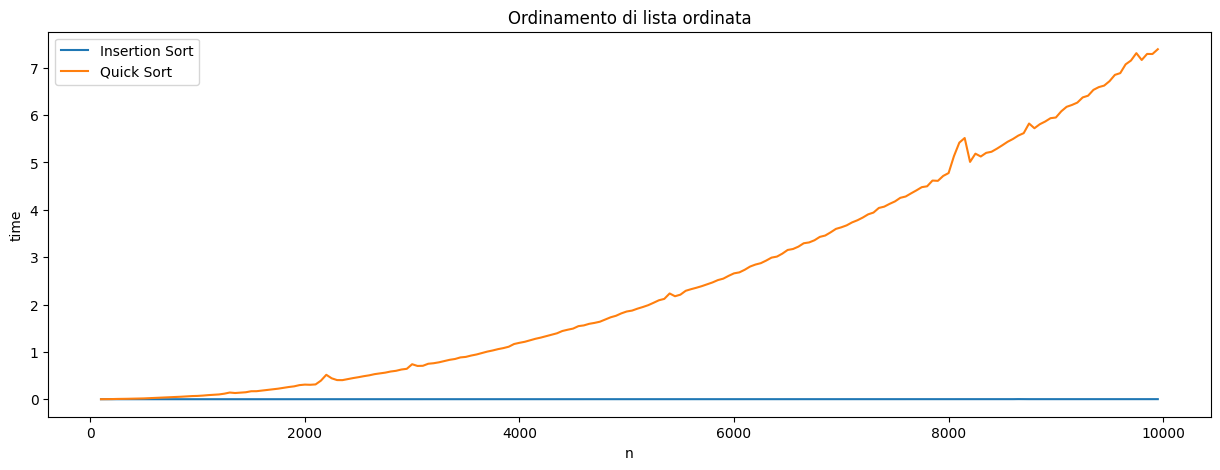

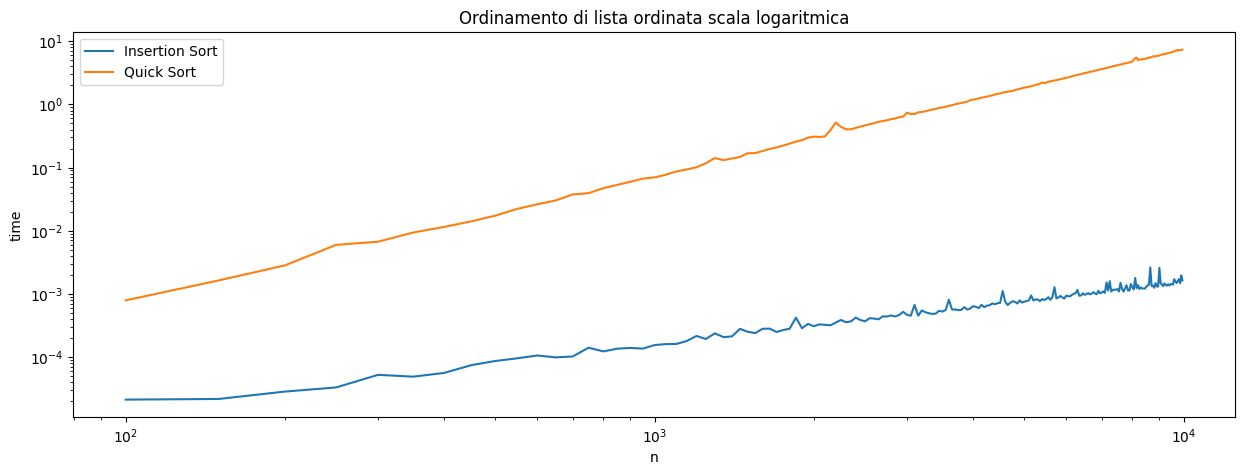

In [26]:
data = run_ordered_test_precise()

plot_results(data, 'Ordinamento di lista ordinata', 'n', 'time')
plot_results(data, 'Ordinamento di lista ordinata scala logaritmica', 'n', 'time', 'log')

Grazie al primo grafico possiamo osservare che all'aumentare delle dimensioni dell'input il tempo di esecuzione per quicksort cresce di conseguenza come una funzione che assomiglia molto a una funzione quadratica. Il secondo grafico, in scala logaritmica permette di comprendere meglio il comportamento dei due algoritmi per piccoli input oltre che nell'interezza dell'esperimento: Insertion-Sort cresce proporzionalmente alla dimensione dell'input. Grazie a questi dati possiamo affermare che in questo esperimento, data la natura dei due algoritmi, insertion-sort è estremamente più veloce di quick-sort.
#### Ordinamento di Lista ordinata in Ordine Decrescente
Da questo esperimento ci aspettiamo che Insertion-sort abbia delle prestazioni pessime in quanto questo è il suo caso peggiore: una lista in ordine decrescente. Per quanto riguarda quick-sort siamo sempre nel caso peggiore in quanto abbiamo la partizione sinistra che contiene zero elementi mentre quella destra ne contiene $n - 1$, quindi, anche qui, ci aspettiamo di vedere una funzione quadratica.

Di seguito il codice usato per i test:

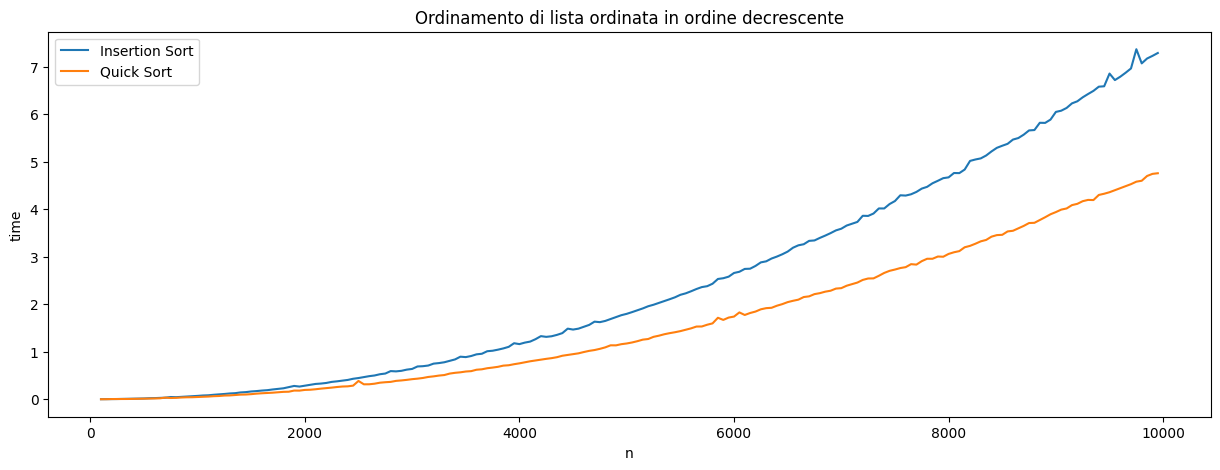

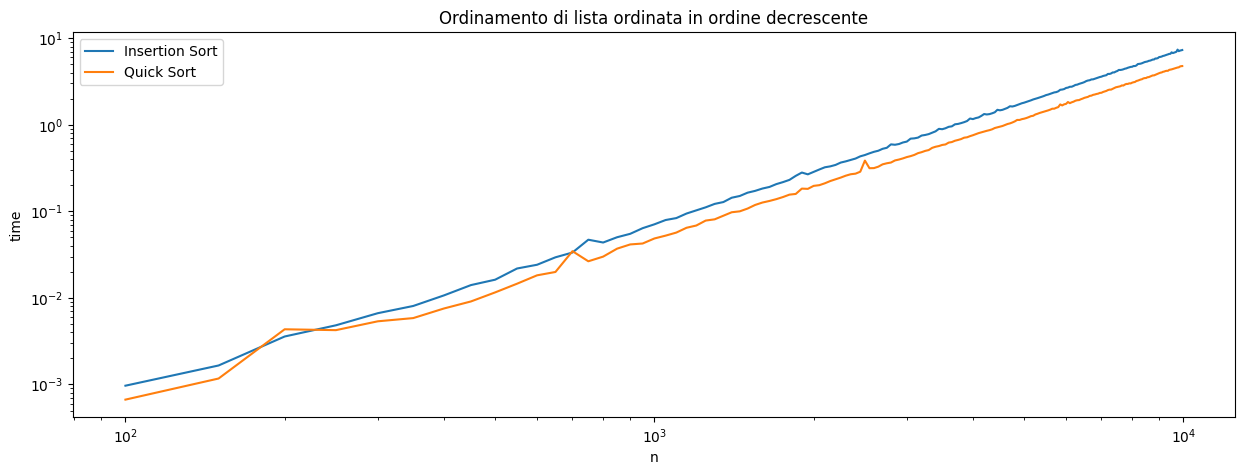

In [27]:
data = run_reverse_order_test_precise()

plot_results(data, 'Ordinamento di lista ordinata in ordine decrescente', 'n', 'time')
plot_results(data, 'Ordinamento di lista ordinata in ordine decrescente', 'n', 'time', 'log')

I dati sperimentali confermano la teoria: entrambi gli algoritmi seguono una funzione quadratica; possiamo però notare che al crescere dell'input la distanza tra i tempi di esecuzione dei due algoritmi si allarga ovvero le due funzioni quadratiche sono governate da costanti diverse. 
#### Ordinamento di Lista con valori casuali tra [0, 1000]
In questo esperimento ci aspettiamo di vedere le differenze più sostanziali tra i due algoritmi: insertion-sort nel caso medio ha un costo in termini di tempo pari a $O(n^2)$
invece quick-sort pari a $O(n \log{}n)$ quindi per input grandi ci aspettiamo una grande differenza tra i tempi di esecuzione dei due.

Di seguito il codice usato per i test:

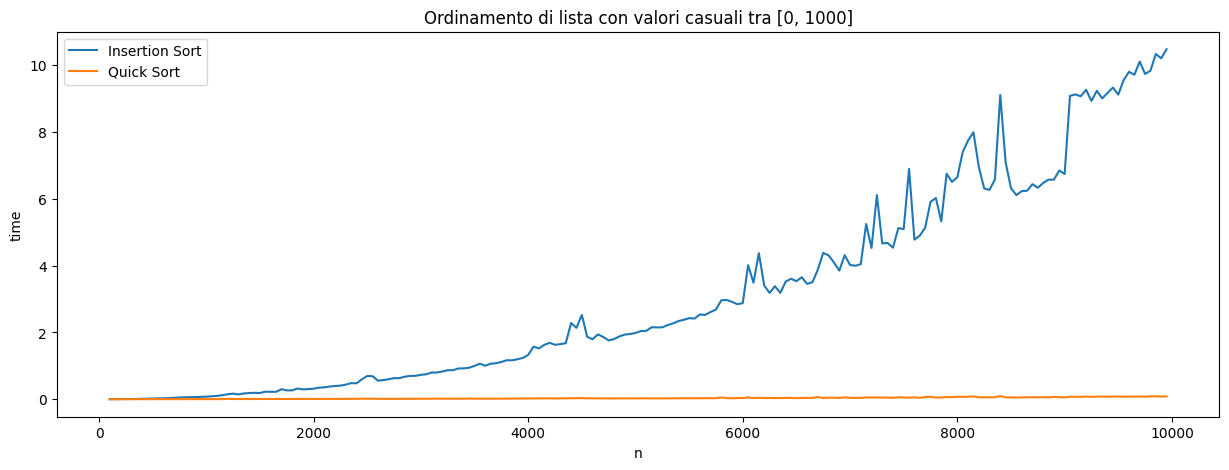

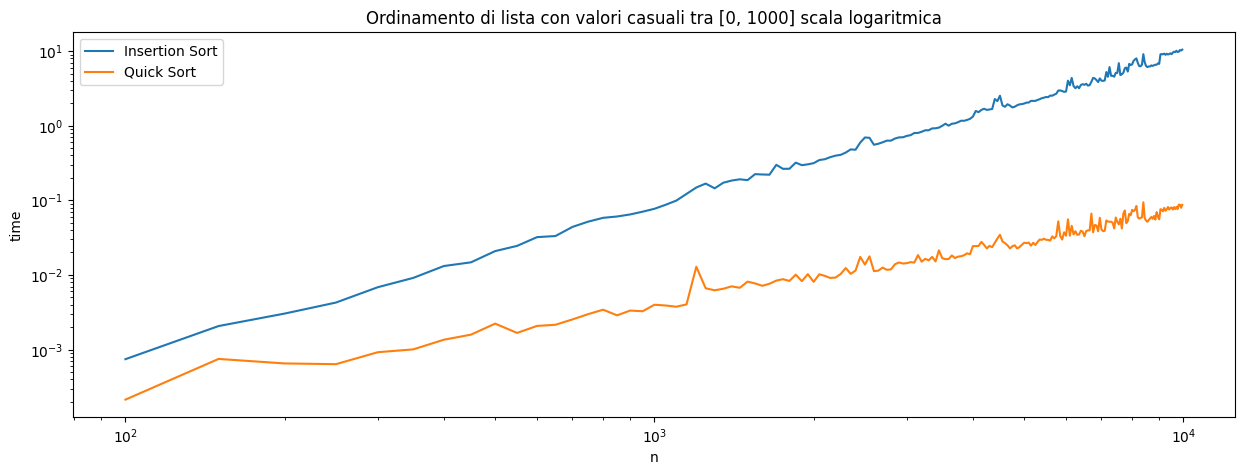

In [34]:
data = run_random_test_precise((0, 1000))

plot_results(data, 'Ordinamento di lista con valori casuali tra [0, 1000]', 'n', 'time')
plot_results(data, 'Ordinamento di lista con valori casuali tra [0, 1000] scala logaritmica', 'n', 'time', 'log')


Con questo esperimento si vedono le rilevanti differenze nei tempi di esecuzione dei due algoritmi per liste di grandezza notevole. È inoltre rilevante notare come, anche per
liste con pochi elementi quicksort sia più veloce di insertion-sort. 
#### Ordinamento di Lista con valori casuali tra [0, 1000000]
In questo ultimo test, variamo il range di generazione dei valori della lista, aumentandolo di 3 ordini di grandezza. Ci aspettiamo di vedere risultati di forma simile al precedente esperimento, con la differenza che in questo caso i tempi di inserion-sort per liste molto lunghe siamo maggiori rispetto a quanto visto precedentemente, perchè, idealmente, stiamo allontanado ogni valore dalla sua posizione nella lista ordinata. Questo perchè il range è molto piu ampio rispetto alla dimensione della lista, quindi la probabilità di valori duplicati diminuisce, il chè porta ad avere meno valori duplicati ad una distanza, al più pari alla dimensione della lista, dalla loro posizione in oridine.   

Di seguito il codice usato per i test:

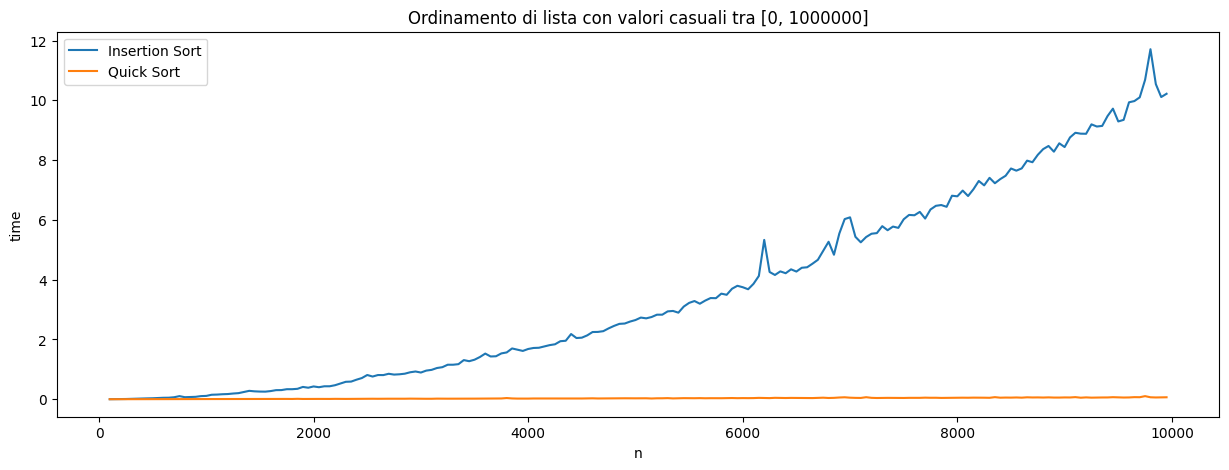

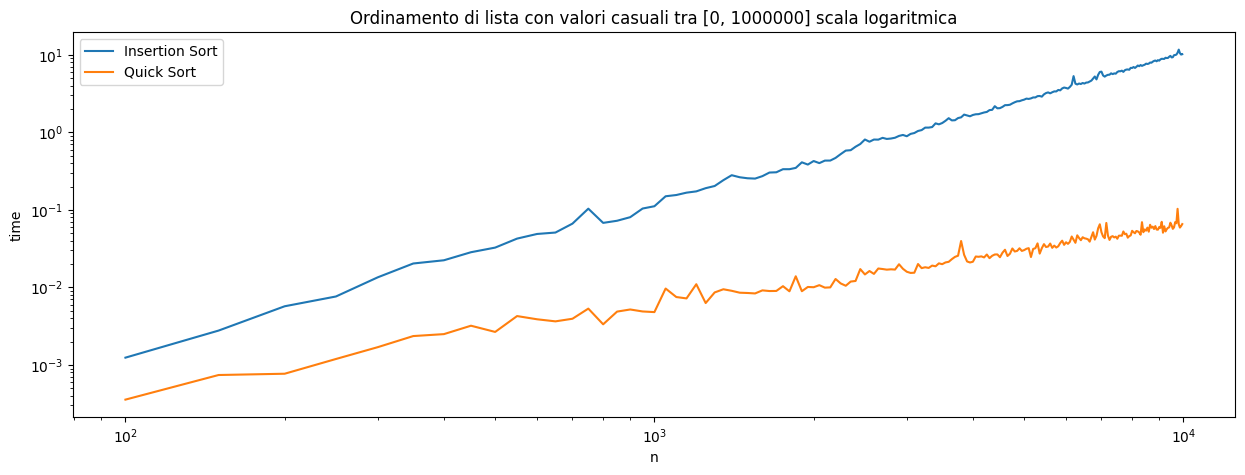

In [35]:
data = run_random_test_precise((0, 1000000))

plot_results(data, 'Ordinamento di lista con valori casuali tra [0, 1000000]', 'n', 'time')
plot_results(data, 'Ordinamento di lista con valori casuali tra [0, 1000000] scala logaritmica', 'n', 'time', 'log')

Con questo esperimento avvaloriamo la tesi espressa precedentemente, i tempi di esecuzione di insertion-sort variano in base alla distanza tra un elemento e la posizione che esso deve occupare. I vantaggi di insertion sort si vedono quindi su dati che sono ad una distanza relativamente piccola da quella che dovrebbero occupare.
## Conclusioni
Come abbiamo visto con gli esperimenti, sono pochi i casi in cui insertion-sort è piu veloce di quicksort. In generale quindi conviene combinare i due algoritmi in modo da ottenere sia i pregi di uno che dell'altro, ad esempio fermando la ricorsione di quicksort ad un valore abbastanza piccolo, circa 50, e usare insertion-sort per ordinare tali partizioni.